# **AYUDANTÍA 13 - Introducción a la Ciencia de Datos - IMT2200**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)



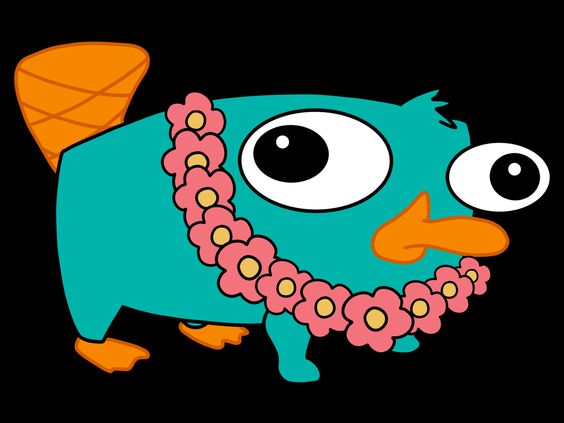

## **PCA (Anlisis de Componentes Principales)**

Imaginemos que queremos predecir los precios de alquiler de vivienda del mercado. Al recopilar información de diversas fuentes tendremos en cuenta variables como tipo de vivienda, tamaño de vivienda, antigüedad, servicios, habitaciones, con/sin jardín, con/sin piscina, con/sin muebles  pero también podemos tener en cuenta la distancia al centro, si hay colegio en las cercanías, o supermercados, si es un entorno ruidoso, si tiene autopistas en las cercanías, la “seguridad del barrio”, si se aceptan mascotas, tiene wifi, tiene garaje, trastero… y seguir y seguir sumando variables.

Es posible que cuanta más (y mejor) información, obtengamos una predicción más acertada. Pero también empezaremos a notar que la ejecución de nuestro algoritmo seleccionado (regresión lineal, redes neuronales, etc.) empezará a tomar más y más tiempo y recursos. Es posible que algunas de las variables sean menos importantes y no aporten demasiado valor a la predicción. También podríamos acercarnos peligrosamente a causar overfitting al modelo.

https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

In [1]:
from matplotlib import pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
import numpy as np
import pandas as pd

En resumen lo que hace el algoritmo es:

Estandarizar los datos de entrada (ó Normalización de las Variables)

Obtener los autovectores y autovalores de la matriz de covarianza

Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).

Construir la matriz de proyección W con los “k” autovectores seleccionados.

Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=3)

In [6]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
n_samples, h, w = lfw_people.images.shape
print("n_imagenes: %d, %dx%d pixeles" %(n_samples,h,w))

n_imagenes: 7606, 62x47 pixeles


In [8]:
# para ML se usan los datos directamente como un arreglo de h*w pixeles. Cada pixel es un "feature"
X=lfw_people.data
n_features = lfw_people.data.shape[1]

# la etiqueta a predecir es el ID de la persona en la imagen
y=lfw_people.target

#cada id corresponde a un nombre
target_names = lfw_people.target_names
y_names=[target_names[x] for x in y]

#numero de personas distintas en el dataset
n_classes = target_names.shape[0]

print("Dataset:")
print("n_imagenes: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Dataset:
n_imagenes: 7606
n_features: 2914
n_classes: 901


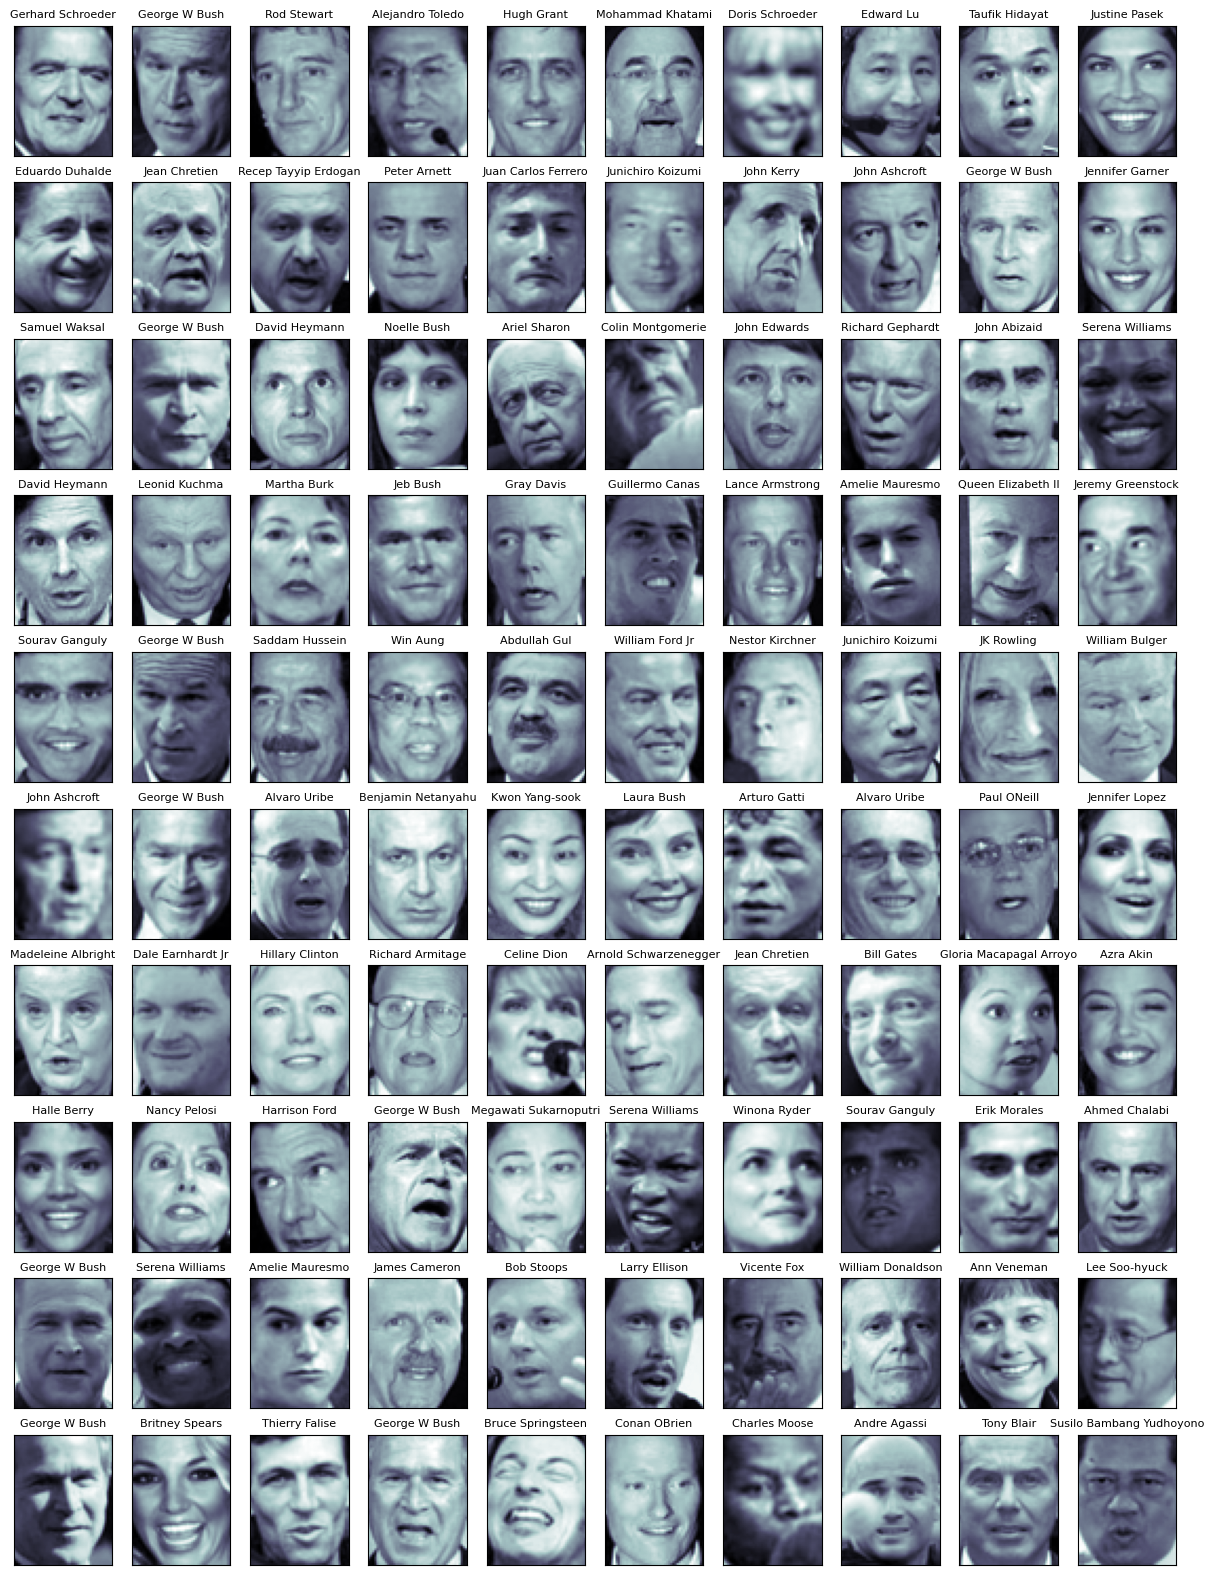

In [9]:
#graficamos algunas caras

fig = plt.figure(figsize=(15, 20))

# plot several images
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(h,w), cmap=plt.cm.bone)
    ax.set_title('%s'%y_names[i],fontsize=8)

In [10]:
names, counts = np.unique(y_names, return_counts=True)
df=pd.DataFrame(columns=['name','nImages'])
df['name']=names
df['nImages']=counts
df.sort_values(by='nImages')

name  nImages
639      Orlando Bloom        3
255    Filippo Inzaghi        3
567     Megan Mullally        3
569   Melanie Griffith        3
572    Michael Ballack        3
..                 ...      ...
280  Gerhard Schroeder      109
209    Donald Rumsfeld      121
843         Tony Blair      144
169       Colin Powell      236
278      George W Bush      530

[901 rows x 2 columns]

In [11]:
#para evitar datos muy desbalanceados, conservaremos sólo max 50 imágenes por persona
mask = np.zeros(lfw_people.target.shape , dtype=np.bool )

for target in np.unique(lfw_people.target ):
    mask[np.where(lfw_people.target ==target)[0][:50]] = 1

X = lfw_people.data[mask]
y =np.int_(lfw_people.target[mask])
y_names=[target_names[x] for x in y]

X.shape

<ipython-input-11-a7c128efe42f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(lfw_people.target.shape , dtype=np.bool )


(6646, 2914)

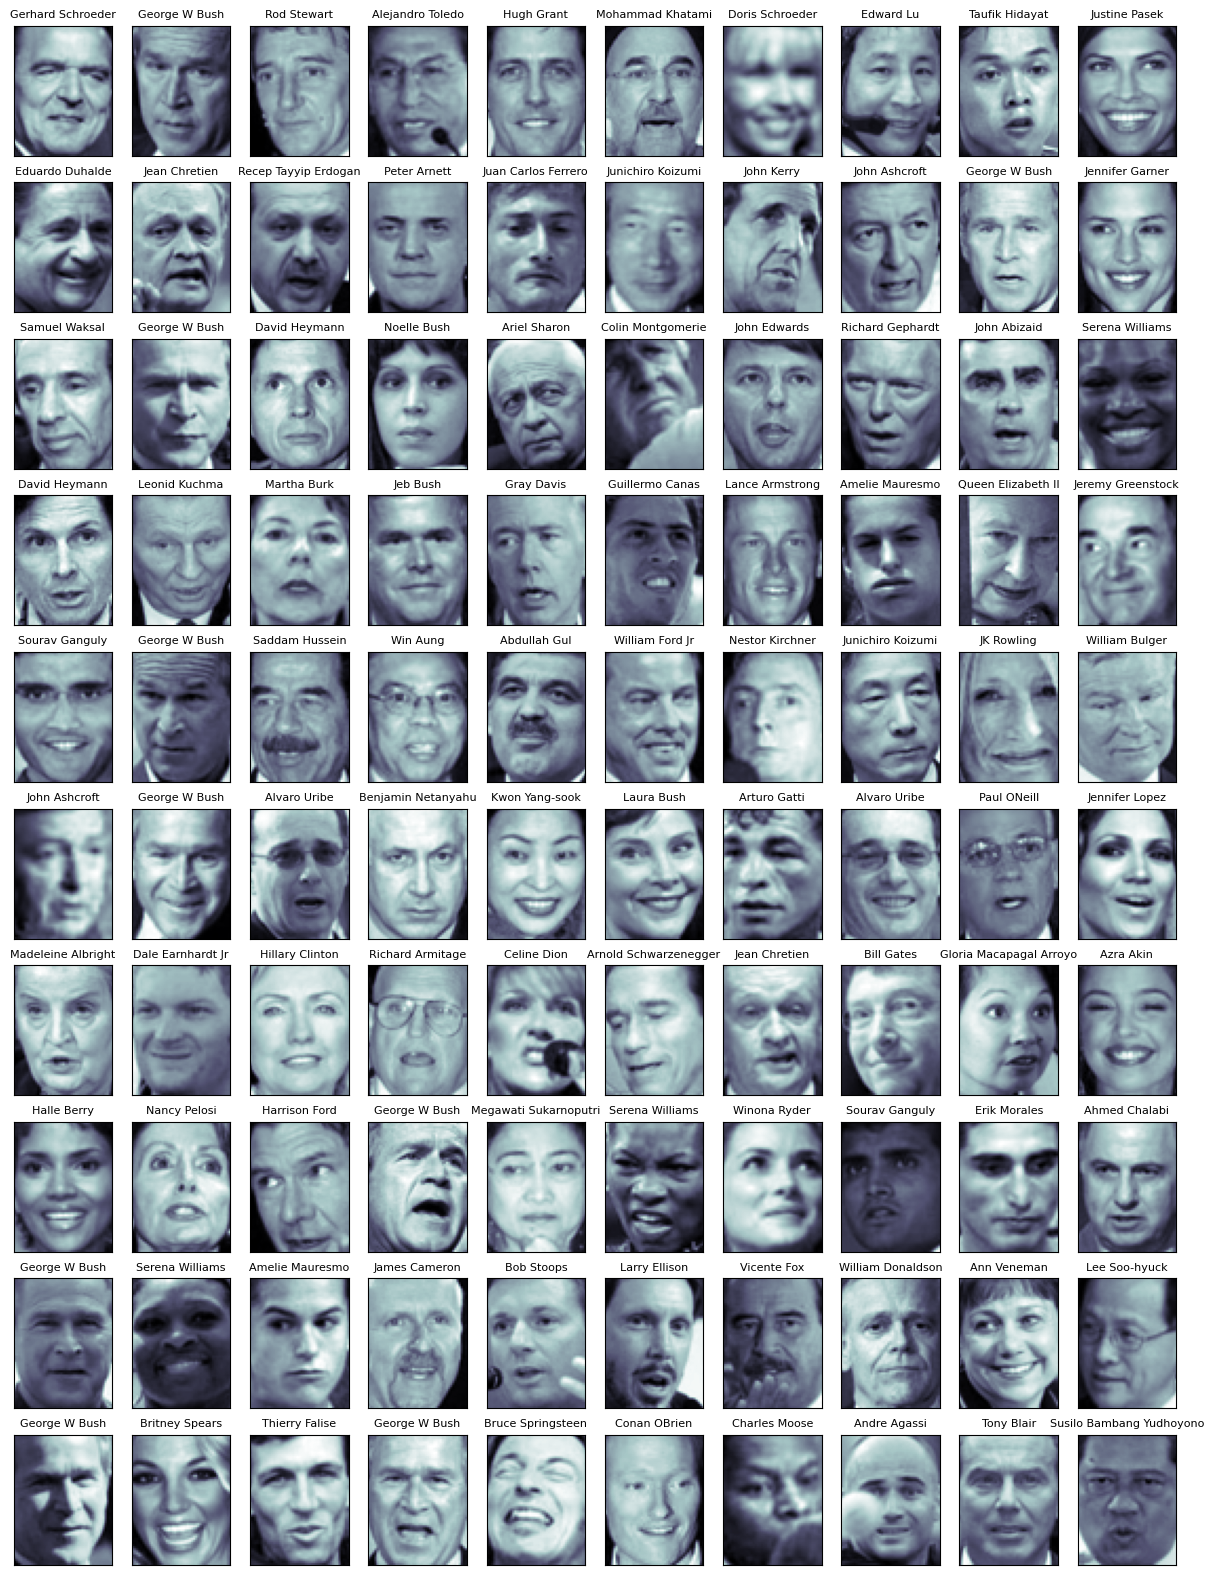

In [12]:
#volvemos a graficar el dataset filtrado
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 20))
# plot several images
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(h,w), cmap=plt.cm.bone)
    ax.set_title('%s'%target_names[y[i]],fontsize=8)

Ahora preparemos un modelo!!

In [13]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.2, random_state=0)
train_img.shape

(5316, 2914)

In [14]:
import timeit
#tiempo inicial
start_time = timeit.default_timer()

# code you want to evaluate
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_img,train_lbl)
test_pred=neigh.predict(test_img)

#tiempo transcurrido
elapsed = timeit.default_timer() - start_time
print('Tiempo de entrenamiento (dataset original):',elapsed, 's')

Tiempo de entrenamiento (dataset original): 1.921207772999992 s


In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy (dataset original):',accuracy_score(test_lbl,test_pred))

Accuracy (dataset original): 0.09473684210526316


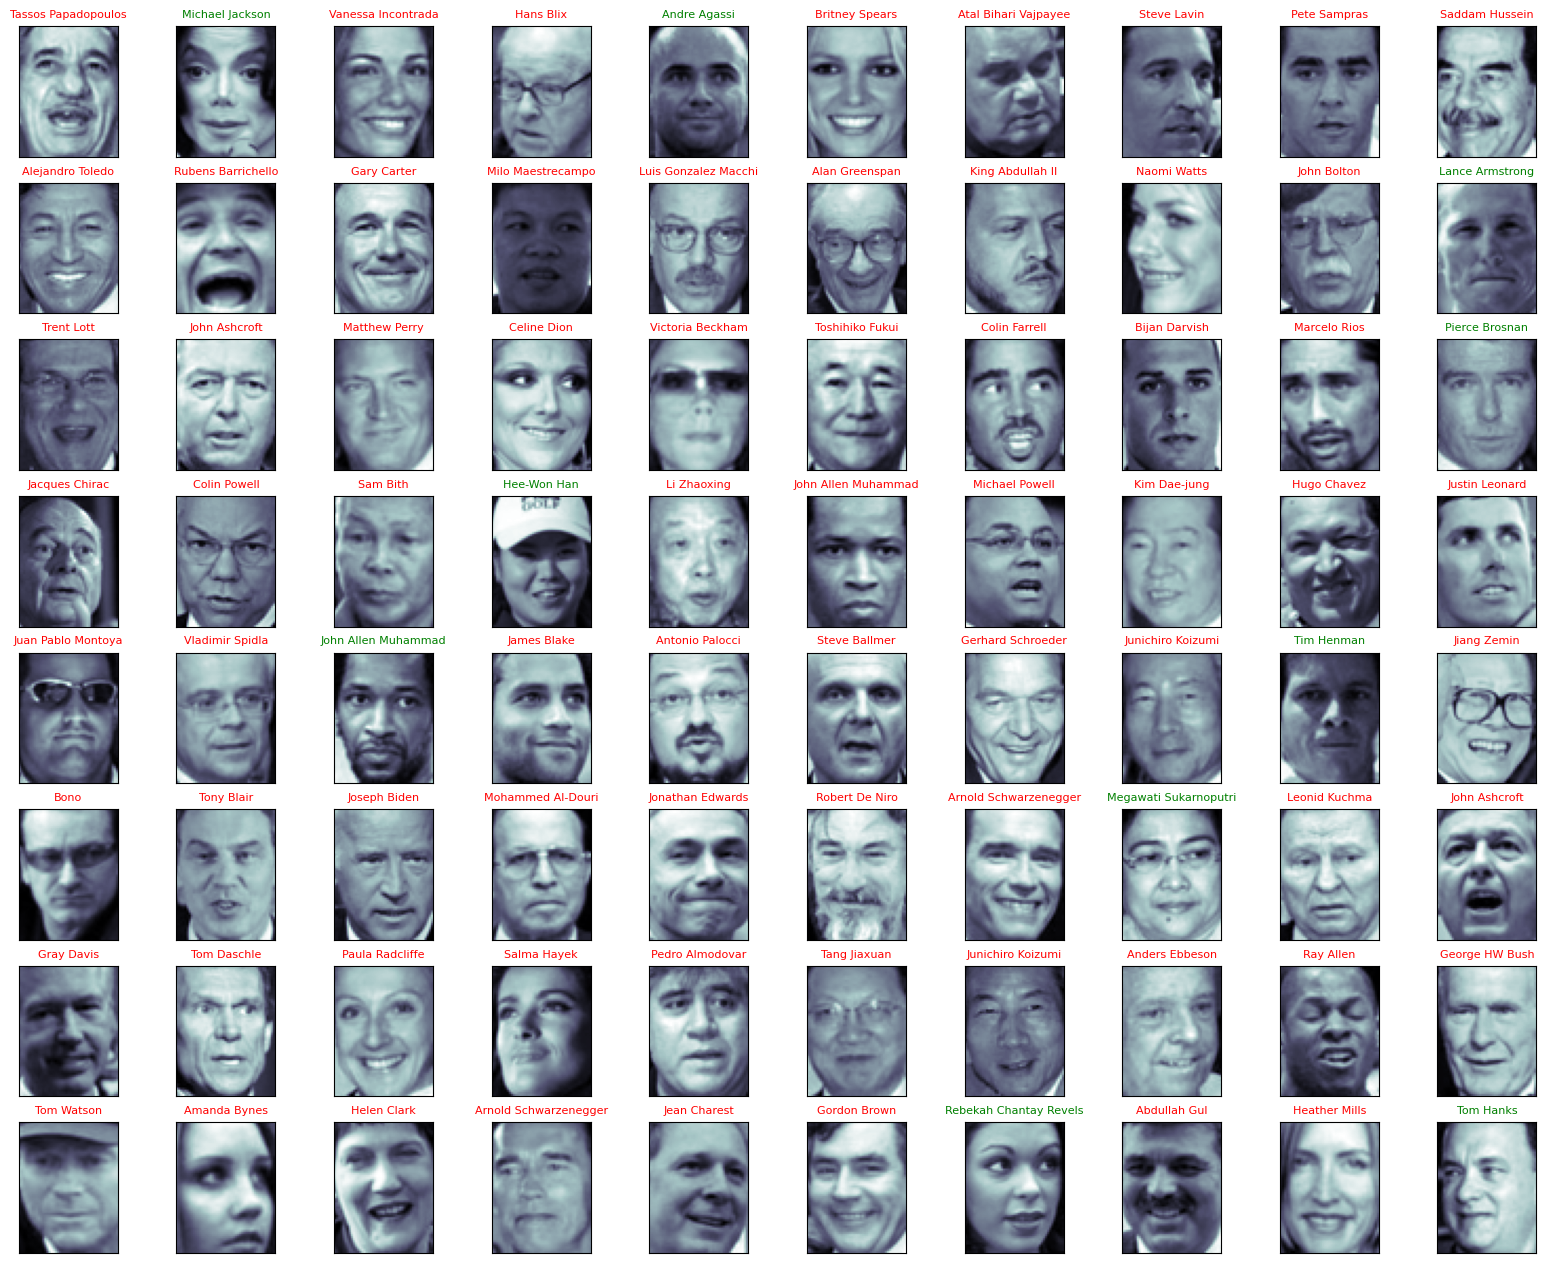

In [16]:
#grafiquemos los resultados del entrenamiento
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))

for i in range(80):
    ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    ax.imshow(test_img[i].reshape(h,w), cmap=plt.cm.bone)

    if test_pred[i]==test_lbl[i]:
        ax.set_title('%s'%(target_names[test_lbl[i]]),fontsize=8,color='green')
    else:
        ax.set_title('%s'%(target_names[test_lbl[i]]),fontsize=8,color='red')

# PCA

Típicamente utilizamos PCA para reducir dimensiones del espacio de características original (aunque PCA tiene más aplicaciones). Hemos rankeado las nuevas dimensiones de “mejor a peor reteniendo información”. Pero ¿cuantas elegir para obtener buenas predicciones, sin perder información valiosa? Podemos seguir 3 métodos:

Método 1: Elegimos arbitrariamente “las primeras n dimensiones” (las más importantes). Por ejemplo si lo que queremos es poder graficar en 2 dimensiones, podríamos tomar las 2 características nuevas y usarlas como los ejes X e Y.

Método 2: calcular la “proporción de variación explicada“ de cada característica  e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo hasta alcanzar a explicar el 85% de la variabilidad total.

Método 3: Crear una gráfica especial llamada scree plot -a partir del Método 2- y seleccionar cuántas dimensiones usaremos por el método “del codo” en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.



In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar parámetros de escalamiento.
scaler.fit(train_img)

# Aplicar el mismo escalalmiento a datos de entrenamiento y prueba.
train_img_sc = scaler.transform(train_img)
test_img_sc = scaler.transform(test_img)

In [18]:
pca = PCA() # no especificamos aun el nº de componentes, para analizar la varianza explicada
pca.fit(train_img)

PCA()

(0.0, 500.0)

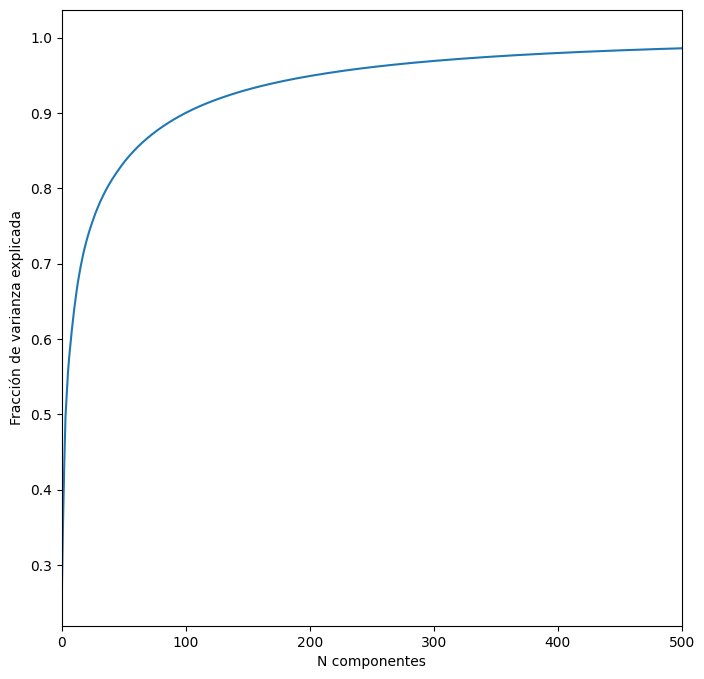

In [19]:
#graficamos la fracción de varianza *acumulada* para distintos números de componentes

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('N componentes')
ax.set_ylabel('Fracción de varianza explicada')
ax.set_xlim(0,500)

In [20]:
pca = PCA(n_components=200) # ahora sí especificamos el nº de componentes, de tal forma que la varianza explicada sea alta
pca.fit(train_img)

#aplicamos la transformación a los datos de entrenamiento y prueba
train_img_pca = pca.transform(train_img)
test_img_pca = pca.transform(test_img)
#aplicamos la transformación inversa para visualizar los datos con dimensionalidad reducida
approx = pca.inverse_transform(train_img_pca)

<ipython-input-21-536de3281d34>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(4,2))


<Figure size 1500x2000 with 0 Axes>

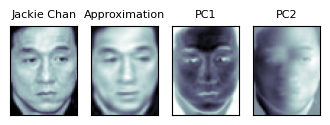

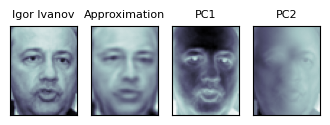

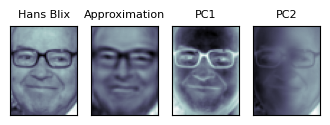

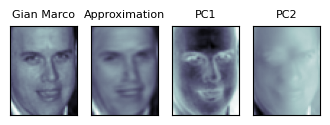

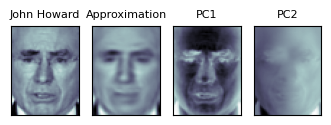

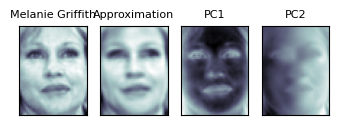

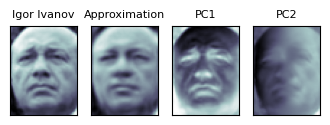

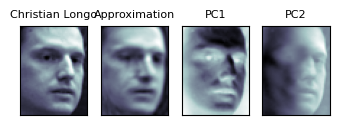

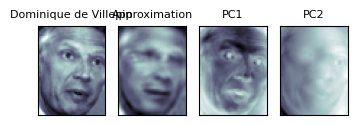

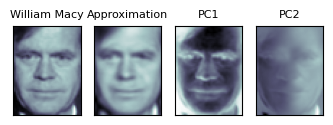

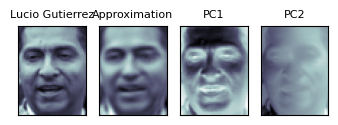

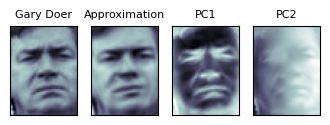

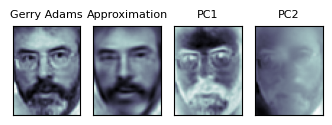

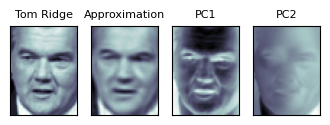

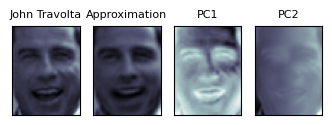

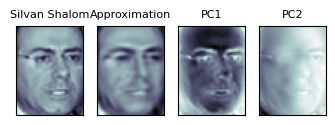

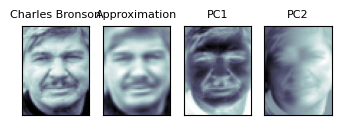

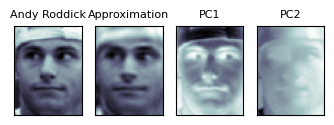

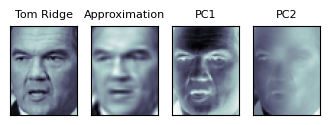

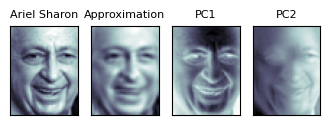

In [21]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 20))

for i in range(20):
    fig = plt.figure(figsize=(4,2))
    ax1 = fig.add_subplot(1, 4, 1, xticks=[], yticks=[])
    ax2 = fig.add_subplot(1, 4, 2, xticks=[], yticks=[])
    ax3 = fig.add_subplot(1, 4, 3, xticks=[], yticks=[])
    ax4 = fig.add_subplot(1, 4, 4, xticks=[], yticks=[])

    #imagen original
    ax1.imshow(train_img[i].reshape(h,w), cmap=plt.cm.bone)
    ax1.set_title('%s'%target_names[train_lbl[i]],fontsize=8)

    #imagen transformada
    ax2.imshow(approx[i].reshape(h,w), cmap=plt.cm.bone)
    ax2.set_title('Approximation',fontsize=8)

    #pc1
    pc1=pca.components_[0]*train_img[i]
    ax3.imshow(pc1.reshape(h,w), cmap=plt.cm.bone)
    ax3.set_title('PC1',fontsize=8)

    #pc2
    pc2=pca.components_[1]*train_img[i]
    ax4.imshow(pc2.reshape(h,w), cmap=plt.cm.bone)
    ax4.set_title('PC2',fontsize=8)

In [22]:
#entrenamos el clasificador ocn el dataset transformado (100 componentes principales)
#tiempo inicial
start_time = timeit.default_timer()

# code you want to evaluate
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_img_pca,train_lbl)
test_pred=neigh.predict(test_img_pca)
accuracy_score(test_lbl,test_pred)

#tiempo transcurrido
elapsed = timeit.default_timer() - start_time
print('Time elapsed:',elapsed)

Time elapsed: 0.1937115570000003


In [23]:
accuracy_score(test_lbl,test_pred)

0.1

In [24]:
components=np.arange(1,300,20)
times=[]
accuracy=[]

for ncom in components:
    print('N components:',ncom)
    pca = PCA(n_components=ncom)
    pca.fit(train_img)

    #aplicamos la transformación a los datos de entrenamiento y prueba
    train_img_pca = pca.transform(train_img)
    test_img_pca = pca.transform(test_img)

    start_time = timeit.default_timer()

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(train_img_pca,train_lbl)
    test_pred=neigh.predict(test_img_pca)

    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    accuracy.append(accuracy_score(test_lbl,test_pred))

N components: 1
N components: 21
N components: 41
N components: 61
N components: 81
N components: 101
N components: 121
N components: 141
N components: 161
N components: 181
N components: 201
N components: 221
N components: 241
N components: 261
N components: 281


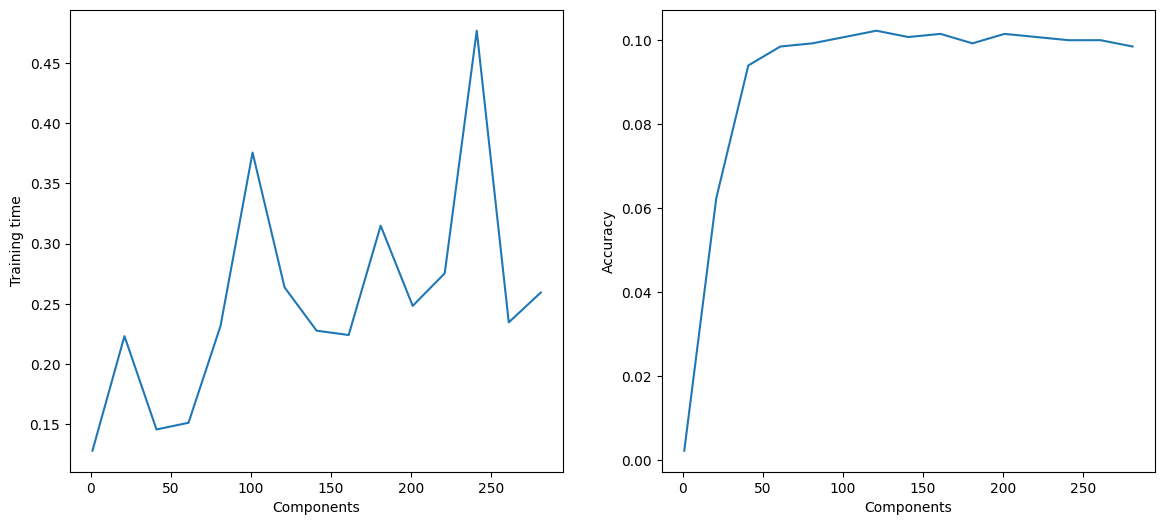

In [25]:
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(121,xlabel='Components')
ax2=fig.add_subplot(122,xlabel='Components')

ax1.plot(components, times)
ax2.plot(components, accuracy)

ax1.set_ylabel('Training time')
ax2.set_ylabel('Accuracy');

# Otro ejemplo de PCA:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data
data.shape


(1797, 64)

In [27]:
h, w = data.shape


In [28]:
# para ML se usan los datos directamente como un arreglo de h*w pixeles. Cada pixel es un "feature"
X=data
n_features = data.shape[1]

# la etiqueta a predecir es el ID de la persona en la imagen
y=lfw_people.target

#cada id corresponde a un nombre
target_names = lfw_people.target_names
y_names=[target_names[x] for x in y]

#numero de personas distintas en el dataset
n_classes = target_names.shape[0]

print("Dataset:")
print("n_imagenes: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Dataset:
n_imagenes: 7606
n_features: 64
n_classes: 901


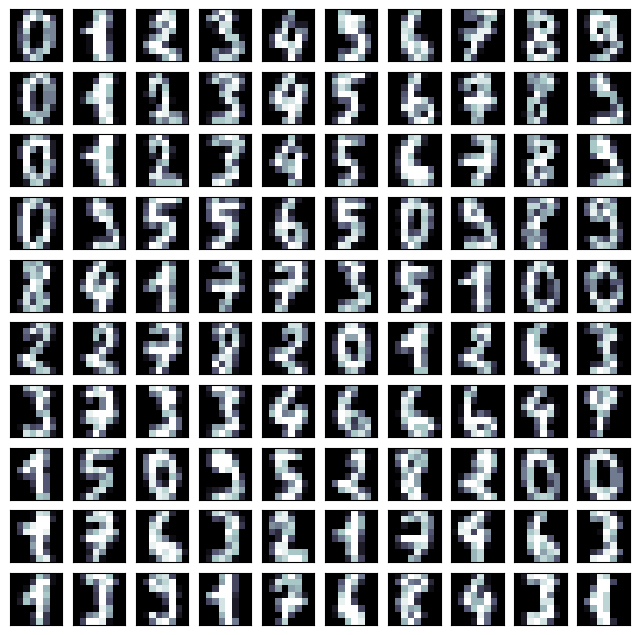

In [29]:
#graficamos algunas numeros

fig = plt.figure(figsize=(8, 8))

# plot several images
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(8,8), cmap=plt.cm.bone)


In [30]:
#Import required modules
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

<ipython-input-31-9e4f3460097a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-31-9e4f3460097a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


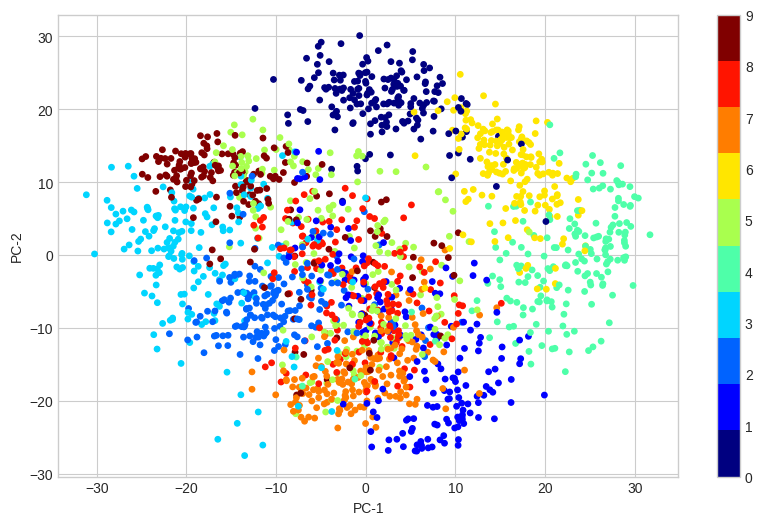

In [31]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

# ¿Que otras motivaciones tiene usar el PCA?

Utilizacion en la compresion de imagenes :O

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

TypeError: ignored

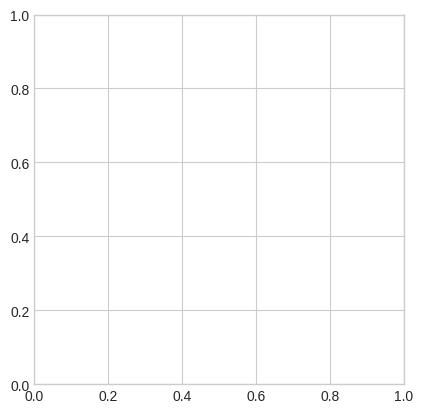

In [33]:
img = cv2.imread('kelly.jpeg') #you can use any image you want.
plt.imshow(img)

In [ ]:
# Splitting the image in R,G,B arrays.

blue,green,red = cv2.split(img)
#it will split the original image into Blue, Green and Red arrays.

In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(2)

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [ ]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)


In [ ]:
#viewing the compressed image
plt.imshow(img_compressed)

In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(20)

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

#viewing the compressed image
plt.imshow(img_compressed)


In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(100)

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

#viewing the compressed image
plt.imshow(img_compressed)

Con 100 componentes ya recuperamos a Kelly 💗

# Espero que el curso haya sido de su agrado y que sigan por el camino de la ciencia de datos con entusiasmo y ganas de seguir aprendiendo :D !

Se despide Rocio Ldg 💮

Agradecimeintos:

- Al material entregado por la profesora Paula Aguirre y los ayudantes de la version pasada del curso.

- Al equipo docente, por su disposicion y entrega en este curso.

- A todos los alumnos, que sin ustedes los cursos no tendria sentido.